In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
d = np.load('./all-feats/meta.npz')

In [3]:
d.keys()

['dob',
 'photo_taken',
 'full_path',
 'gender',
 'name',
 'face_location',
 'face_score',
 'second_face_score',
 'celeb_names',
 'celeb_id']

Note: `celeb_id` doesn't actually mean anything, e.g. Brian Kelly refers both to someone born in 1931 and someone born in 1970. So we can't rely on either that or `name` being unique.

In [4]:
w = np.ones(d['dob'].size, dtype=bool)
w[d['dob'] < np.datetime64('1800-01-01')] = False
w[d['name'] == 'Grumpy Cat'] = False
w[d['photo_taken'] < d['dob']] = False
w[d['photo_taken'] > d['dob'] + np.timedelta64(36525, 'D')] = False
w[np.isinf(d['face_score'])] = False

In [5]:
df = pd.DataFrame({k: d[k][w] for k in [
    'dob', 'photo_taken', 'full_path', 'gender', 'name',
    'face_score', 'second_face_score']})

In [6]:
days_old = df['photo_taken'] - df['dob']
df['age'] = days_old / np.timedelta64(365 * 24 + 6, 'h')

In [7]:
df.set_index(['name', 'dob', 'age', 'full_path'], inplace=True)
df.sort_index(inplace=True)

In [8]:
def get_chunk(g):
    years = g.photo_taken.values.astype('datetime64[Y]')
    l_start, l_end = 0, 0
    for start in np.r_[0, np.diff(years).nonzero()[0] + 1]:
        yr = years[start]
        end = years.searchsorted(yr + 4, side='right')
        if end - start > l_end - l_start:
            l_start, l_end = start, end
    sub = g.iloc[l_start:l_end]
    return sub.reset_index(level=[0, 1], drop=True)

In [9]:
chunked = df.groupby(level=[0, 1]).apply(get_chunk)

In [10]:
chunked.head()

face_score  \
name                  dob        age       full_path                                                   
'Lee' George Quinones 1959-12-31 23.498973 42/nm0704042_rm2073418240_1960-0-0_1983.jpg      2.631740   
'Weird Al' Yankovic   1959-10-23 51.687885 48/nm0946148_rm1179500032_1959-10-23_2011.jpg    1.685582   
                                           48/nm0946148_rm1475066112_1959-10-23_2011.jpg    1.874616   
                                 53.689254 48/nm0946148_rm220712192_1959-10-23_2013.jpg     1.984194   
                                 54.688569 48/nm0946148_rm720815616_1959-10-23_2014.jpg     2.256434   

                                                                                          gender  \
name                  dob        age       full_path                                               
'Lee' George Quinones 1959-12-31 23.498973 42/nm0704042_rm2073418240_1960-0-0_1983.jpg       1.0   
'Weird Al' Yankovic   1959-10-23 51.687885 48/nm0946148_rm1179500032_1959-10-23_2011.jpg     1.0   
                                           48/nm0946148_rm1475066112_1959-10-23_2011.jpg     1.0   
                                 53.689254 48/nm0946148_rm220712192_1959-10-23_2013.jpg      1.0   
                                 54.688569 48/nm0946148_rm720815616_1959-10-23_2014.jpg      1.0   

                                                                                         photo_taken  \
name                  dob        age       full_path                                                   
'Lee' George Quinones 1959-12-31 23.498973 42/nm0704042_rm2073418240_1960-0-0_1983.jpg    1983-07-01   
'Weird Al' Yankovic   1959-10-23 51.687885 48/nm0946148_rm1179500032_1959-10-23_2011.jpg  2011-07-01   
                                           48/nm0946148_rm1475066112_1959-10-23_2011.jpg  2011-07-01   
                                 53.689254 48/nm0946148_rm220712192_1959-10-23_2013.jpg   2013-07-01   
                                 54.688569 48/nm0946148_rm720815616_1959-10-23_2014.jpg   2014-07-01   

                                                                                          second_face_score  
name                  dob        age       full_path                                                         
'Lee' George Quinones 1959-12-31 23.498973 42/nm0704042_rm2073418240_1960-0-0_1983.jpg             1.977301  
'Weird Al' Yankovic   1959-10-23 51.687885 48/nm0946148_rm1179500032_1959-10-23_2011.jpg                NaN  
                                           48/nm0946148_rm1475066112_1959-10-23_2011.jpg                NaN  
                                 53.689254 48/nm0946148_rm220712192_1959-10-23_2013.jpg            0.818740  
                                 54.688569 48/nm0946148_rm720815616_1959-10-23_2014.jpg            1.930371

In [11]:
chunked.loc['Brian Kelly']

face_score  \
dob        age       full_path                                                  
1931-02-14 33.377139 23/nm0446223_rm4100114432_1931-2-14_1964.jpg    2.853691   
                     23/nm0446223_rm4133668864_1931-2-14_1964.jpg    5.144049   
                     23/nm0446223_rm4150446080_1931-2-14_1964.jpg    3.393348   
1970-06-30 44.002738 95/nm0898595_rm3082275584_1970-6-30_2014.jpg    2.321225   
                     95/nm0898595_rm3744312576_1970-6-30_2014.jpg    1.893931   
                     95/nm0898595_rm579390208_1970-6-30_2014.jpg     3.609739   

                                                                   gender  \
dob        age       full_path                                              
1931-02-14 33.377139 23/nm0446223_rm4100114432_1931-2-14_1964.jpg     1.0   
                     23/nm0446223_rm4133668864_1931-2-14_1964.jpg     1.0   
                     23/nm0446223_rm4150446080_1931-2-14_1964.jpg     1.0   
1970-06-30 44.002738 95/nm0898595_rm3082275584_1970-6-30_2014.jpg     1.0   
                     95/nm0898595_rm3744312576_1970-6-30_2014.jpg     1.0   
                     95/nm0898595_rm579390208_1970-6-30_2014.jpg      1.0   

                                                                  photo_taken  \
dob        age       full_path                                                  
1931-02-14 33.377139 23/nm0446223_rm4100114432_1931-2-14_1964.jpg  1964-07-01   
                     23/nm0446223_rm4133668864_1931-2-14_1964.jpg  1964-07-01   
                     23/nm0446223_rm4150446080_1931-2-14_1964.jpg  1964-07-01   
1970-06-30 44.002738 95/nm0898595_rm3082275584_1970-6-30_2014.jpg  2014-07-01   
                     95/nm0898595_rm3744312576_1970-6-30_2014.jpg  2014-07-01   
                     95/nm0898595_rm579390208_1970-6-30_2014.jpg   2014-07-01   

                                                                   second_face_score  
dob        age       full_path                                                        
1931-02-14 33.377139 23/nm0446223_rm4100114432_1931-2-14_1964.jpg           2.630130  
                     23/nm0446223_rm4133668864_1931-2-14_1964.jpg                NaN  
                     23/nm0446223_rm4150446080_1931-2-14_1964.jpg           1.911732  
1970-06-30 44.002738 95/nm0898595_rm3082275584_1970-6-30_2014.jpg                NaN  
                     95/nm0898595_rm3744312576_1970-6-30_2014.jpg                NaN  
                     95/nm0898595_rm579390208_1970-6-30_2014.jpg            2.623732

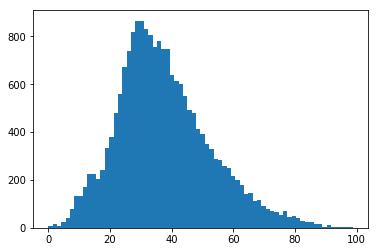

In [12]:
plt.hist(chunked.reset_index(level=2).groupby(level=[0, 1]).age.mean().values, bins='auto');

In [13]:
bag_sizes = df.groupby(level=[0, 1]).size()

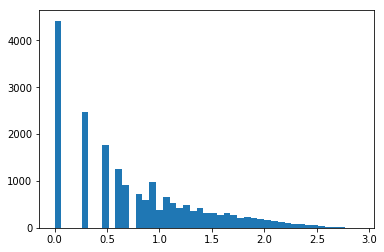

In [14]:
plt.hist(np.log10(bag_sizes), bins='auto');

In [15]:
full_indexer = {n: i for i, n in enumerate(d['full_path'])}

In [16]:
probs = np.load('all-feats/probs.npy')

In [17]:
all_preds = probs.dot(np.arange(101))

In [18]:
df_inds = df.index.get_level_values('full_path').map(full_indexer.get)

In [19]:
df['pred'] = all_preds[df_inds]

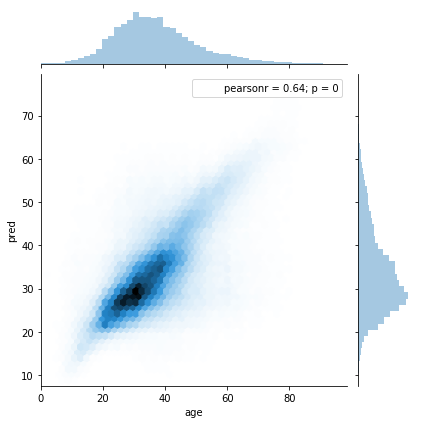

In [20]:
sns.jointplot('age', 'pred', data=df.reset_index(), kind='hexbin')

In [21]:
!mkdir -p grouped-4

In [22]:
df.to_csv('grouped-4/data.csv.gz', compression='gzip')

In [23]:
%%time
np.save('grouped-4/feats.npy', np.load('all-feats/fc7s.npy')[df_inds])

CPU times: user 3.2 s, sys: 11.1 s, total: 14.3 s
Wall time: 2min 8s
